In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from gensim.models import KeyedVectors

In [2]:
from gensim.models import KeyedVectors

In [3]:
model = KeyedVectors.load_word2vec_format('fasttext_vector.vec')

In [4]:
model.similarity("bull", 'bear')

0.29507786861655283

In [5]:
model.most_similar('cup', topn=10)

[('handle', 0.6418533325195312),
 ('pivot', 0.3368726968765259),
 ('shoulder', 0.26471221446990967),
 ('breakout', 0.26115185022354126),
 ('coffee', 0.24554546177387238),
 ('mid', 0.23864224553108215),
 ('this', 0.23516328632831573),
 ('oct', 0.23191648721694946),
 ('form', 0.2314828634262085),
 ('at', 0.2298116832971573)]

In [6]:
model.most_similar('bullish', topn=10)

[('bearish', 0.42114531993865967),
 ('bull', 0.36207255721092224),
 ('engulfing', 0.345408171415329),
 ('pattern', 0.3210718035697937),
 ('ish', 0.29544079303741455),
 ('chart', 0.2922769784927368),
 ('macd', 0.27335241436958313),
 ('strong', 0.2615622282028198),
 ('dominion', 0.2577856779098511),
 ('form', 0.25140002369880676)]

In [7]:
model.most_similar('bull', topn=10)

[('bullish', 0.36207255721092224),
 ('bear', 0.2950778603553772),
 ('flag', 0.2570350766181946),
 ('now', 0.25030434131622314),
 ('rip', 0.23461022973060608),
 ('lotto', 0.23349186778068542),
 ('monthly', 0.23345988988876343),
 ('white', 0.22656914591789246),
 ('fails', 0.22596973180770874),
 ('engulfing', 0.22577360272407532)]

In [8]:
model.most_similar('resistance', topn=10)

[('ma', 0.43547844886779785),
 ('support', 0.3940972089767456),
 ('chart', 0.3622722327709198),
 ('daily', 0.357440710067749),
 ('fib', 0.3511340916156769),
 ('dma', 0.3187726140022278),
 ('above', 0.3145581781864166),
 ('descending', 0.3126392364501953),
 ('sma', 0.3118756413459778),
 ('area', 0.3054161071777344)]

In [9]:
mpl.rcParams['axes.unicode_minus'] = False
vocab = list(model.vocab)
vocab_vector = model[vocab] # vocab_vector: vector  ,  vocab: 단어
# print(len(vocab_vector))
# print(vocab_vector[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(vocab_vector[:100,:])
df_word= pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df_word.shape

(100, 2)

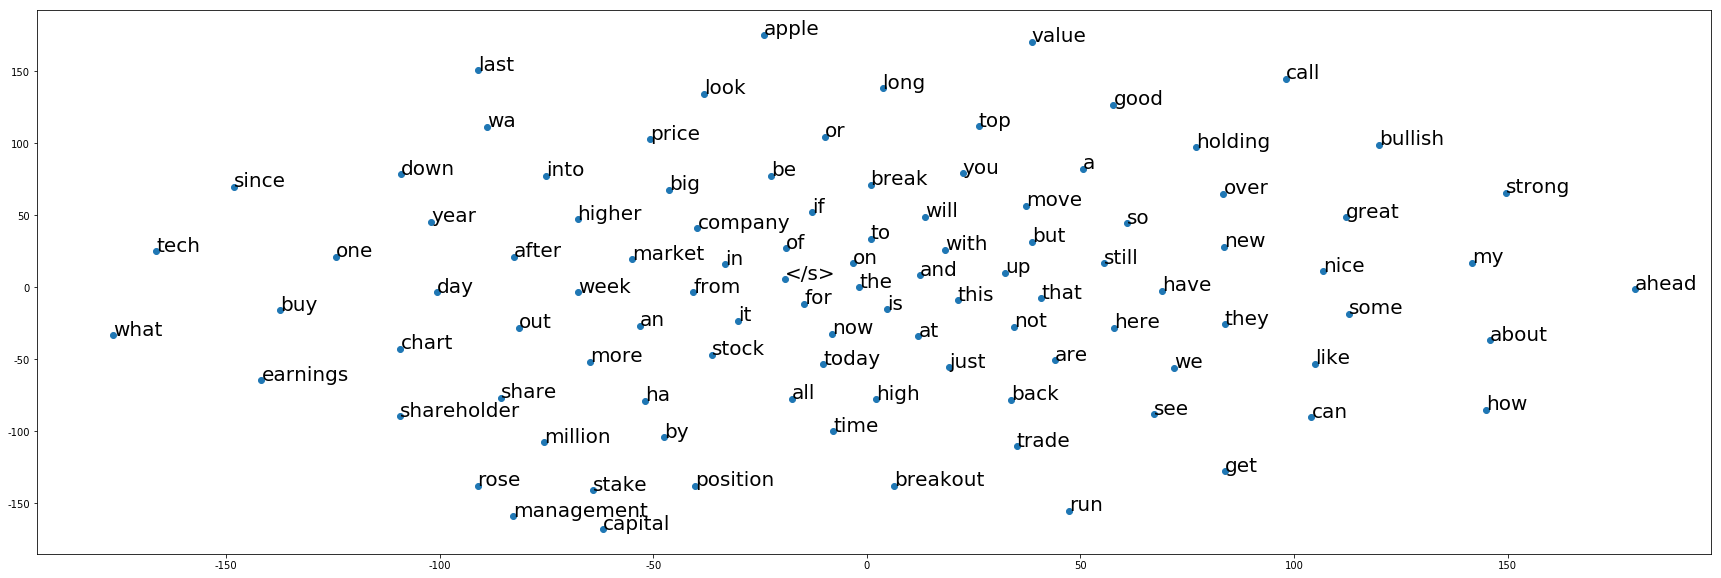

In [10]:
fig = plt.figure()
fig.set_size_inches(30, 10)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_word['x'], df_word['y'])

for word, pos in df_word.iterrows():
    ax.annotate(word, pos, fontsize=20)
plt.show()

In [11]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 256), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

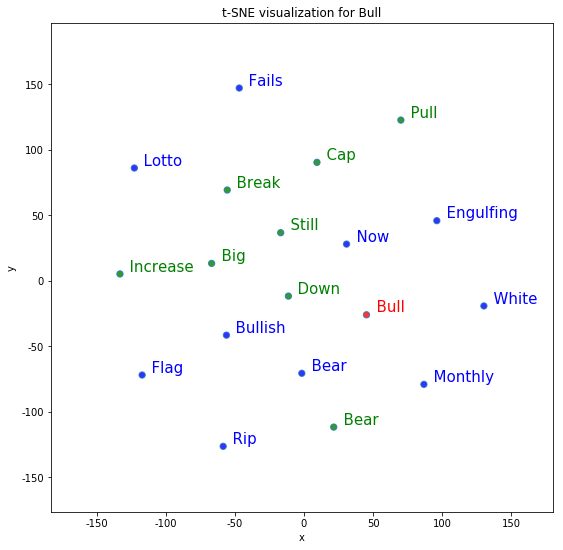

In [12]:
tsnescatterplot(model, 'bull', ['bear', 'increase', 'down', 'pull', 'still', 'big', 'cap', 'break'])

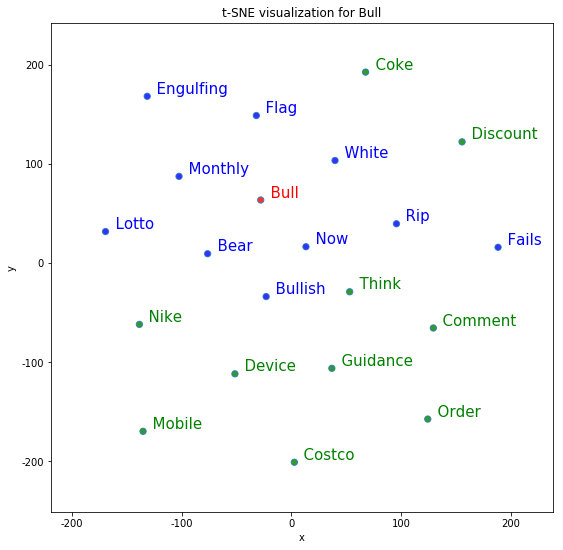

In [13]:
tsnescatterplot(model, 'bull', [i[0] for i in model.most_similar(negative=["bull"])][:])